In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

def gaussian_kernel2d(size, sigma):
    
    s = 2 * sigma ** 2
    center = size // 2
    output = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            y = i - center
            x = j - center
            output[i, j] = np.exp(-(x ** 2 + y ** 2) / s)
    return output / np.sum(output)

image = cv2.imread("tutorial_image/kitty.jpg")
print(f"{image.shape}")

# BCHW -> NCHW   
itensor = image.transpose(2,0,1)[None] # 在前面加一个维度。在最后加一个维度呢？
print(itensor.shape)

kernel = np.vstack([
    np.array(
    [
        [1, 1, -1], 
        [1, -8, -1], 
        [1, 1, -1]
    ])[None] / 8,
    np.array(
    [
        [1, 0, -1], 
        [1, 0, -1], 
        [1, 0, -1]
    ])[None],
    gaussian_kernel2d(3, 10)[None]
    #gaussian_kernel2d(3, 1)[None]
])


n, c, h, w = itensor.shape
print("itensor:",n, c, h, w)

kc, ks, _ = kernel.shape
print("kernel:", kc, ks, ks)


#* 计算输出维度的列数s = (image_width - kernel_width + 1) x (image_height - kernel_height + 1)
# for one image
s = (w - ks + 1) * (h - ks + 1)
print(s)
kernel.shape
image.shape
itensor.shape


# %%
column = np.zeros((ks * ks * kc, s)) # for one image
column.shape


# %%
krow = kernel.reshape(-1, ks**2*kc)
krow.shape


# %%
st_offset = ks // 2
end_offset = -(ks // 2)
st_offset, end_offset

(265, 332, 3)
(1, 3, 265, 332)
itensor: 1 3 265 332
kernel: 3 3 3
86790


(1, -1)

In [2]:

ksize = ks * ks

for ic in range(c):
    col_x = 0 # 从column 的第0列开始填数
    for cy in range(st_offset, h + end_offset):
        for cx in range(st_offset, w + end_offset):
            for ky in range(ks):
                for kx in range(ks):
                    pixel_value = itensor[0, ic, cy - st_offset + ky, cx - st_offset + kx]
                    col_y = ic * ksize + ky * ks + kx # !!!先定位高维度，再定义低纬度
                    column[col_y, col_x] = pixel_value
        
            col_x += 1 # 每完成完一个感受野，就到column 的下一列
        



In [3]:
def save_var_to_pkl(var, file_name):
    import pickle as pkl
    pkl.dump(var,open(f"{file_name}","wb"))

def load_var_from_pkl(file_name):
    import pickle as pkl
    return pkl.load(open(f"{file_name}","rb"))

In [4]:
# save_var_to_pkl(column, "my_column.pkl")


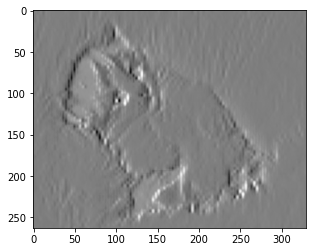

In [5]:
output = krow @ column
out_image = output.reshape(h - ks + 1, w - ks + 1)
out_image = (out_image - np.min(out_image) / (np.max(out_image) - np.min(out_image)))
plt.imshow(out_image, cmap="Greys")